In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/reddit_post.csv')

In [6]:

# Function to concatenate body strings of each author
def concatenate_bodies(group):
    concatenated = ''
    for body in group['body']:
        if len(body) >= 300:
            yield body
        else:
            if len(concatenated) > 0:
                concatenated += ' '
            concatenated += body
            if len(concatenated) >= 300:
                yield concatenated
                concatenated = ''
    if len(concatenated) > 0:
        yield concatenated

# List to collect the new rows
new_rows = []

# Group by 'author' and process each group
for author, group in data.groupby('author'):
    for concatenated_body in concatenate_bodies(group):
        if len(concatenated_body) >= 300:
            new_rows.append({
                'author': author,
                'body': concatenated_body,
                'mbti': group.iloc[0]['mbti']  # assuming 'mbti' is the same for all rows of the same author
            })

# Create a new DataFrame from the new rows
new_df = pd.DataFrame(new_rows)

<Axes: >

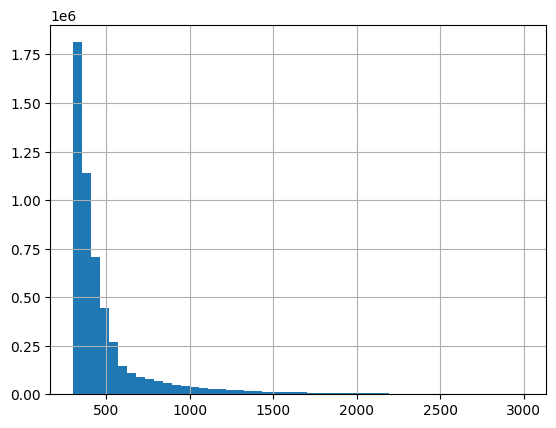

In [9]:
# plot the distribution of the length of the concatenated bodies
new_df['body'].apply(len).hist(bins=50)


In [10]:
# save the new DataFrame to a new CSV file
new_df.to_csv('data/reddit_post_combined.csv', index=False)